## Imports

In [1]:
# from numpy.random import seed
# seed(888)
# from tensorflow import set_random_seed
# set_random_seed(404)

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

import itertools
from sklearn.metrics import confusion_matrix


import keras
from keras.datasets import cifar10
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout
from keras.callbacks import TensorBoard

from time import strftime

from IPython.display import display

%matplotlib inline

C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nandushreyas\anaconda3\envs\Python\lib\s

## Constants

In [2]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane' , 'Car' , 'Bird' , 'Cat' , 'Deer' , 'Dog' , 'Frog' , 'Horse' ,'Ship' , 'Truck']

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT * IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## 1 Get the Data


In [3]:
(X_train_all , y_train_all) , (X_test , y_test) = cifar10.load_data()

In [4]:
type(cifar10)

module

In [5]:
type(X_train_all)

numpy.ndarray

## 2 Explore the Data

In [6]:
X_train_all

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
X_train_all[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [8]:
X_train_all.shape

(50000, 32, 32, 3)

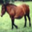

In [9]:
pic = array_to_img(X_train_all[7])
display(pic)

In [10]:
y_train_all

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train_all.shape

(50000, 1)

In [12]:
y_train_all[7][0]

7

In [13]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

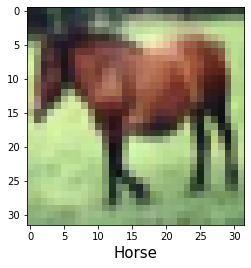

In [14]:
plt.imshow(X_train_all[7])
plt.xlabel(LABEL_NAMES[y_train_all[7][0]] , fontsize = 15)
plt.show()

In [15]:
X_train_all.shape

(50000, 32, 32, 3)

In [16]:
no_images , x , y , c = X_train_all.shape
print(f'images = {no_images}\t | width = {x}\t | height = {y}\t | channels = {c}')

images = 50000	 | width = 32	 | height = 32	 | channels = 3


## 3 Pre-Process Data

In [17]:
type(X_train_all[0][0][0][0])

numpy.uint8

In [18]:
X_train_all , X_test = X_train_all / 255 , X_test / 255

In [19]:
X_train_all[0][0][0][0]

0.23137254901960785

In [20]:
X_train_all = X_train_all.reshape(X_train_all.shape[0] , TOTAL_INPUTS)
print(f'The shape of X_train_all is {X_train_all.shape}')

The shape of X_train_all is (50000, 3072)


In [21]:
X_test = X_test.reshape(len(X_test) , TOTAL_INPUTS)
print(f'The shape of X_test is {X_test.shape}')

The shape of X_test is (10000, 3072)


### 3.1 Creating Validation Dataset

In [22]:
x_val = X_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [23]:
x_val.shape

(10000, 3072)

In [24]:
y_val.shape

(10000, 1)

### 3.2 Creating X_train and y_train

In [25]:
X_train = X_train_all[VALIDATION_SIZE : ]
X_train.shape

(40000, 3072)

In [26]:
y_train = y_train_all[VALIDATION_SIZE : ]
y_train.shape

(40000, 1)

### 3.3 Creating Small Dataset for Illustration

In [27]:
X_train_xs = X_train[ : SMALL_TRAIN_SIZE]
y_train_xs = y_train[ : SMALL_TRAIN_SIZE]

## 4 Define the Neural Network using Keras

### Step 1 : Defining your model

In [28]:
model_1 = Sequential([
    Dense(units = 128 , input_dim = TOTAL_INPUTS , activation = 'relu' , name = 'm1_hidden1') , 
    Dense(units = 64 , activation = 'relu' , name = 'm1_hidden2') , 
    Dense(units = 16 , activation = 'relu' , name = 'm1_hidden3') , 
    Dense(10 , activation = 'softmax' , name = 'm1_output')
])

### Step 2 : Compiling the Model

In [29]:
model_1.compile(optimizer = 'adam' , 
               loss = 'sparse_categorical_crossentropy' , 
               metrics = ['accuracy'])

In [30]:
type(model_1)

keras.engine.sequential.Sequential

In [31]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [32]:
(32*32*3*128 + 128) + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

**Model 2 and Model 3**

In [33]:
model_2 = Sequential()
model_2.add(Dropout(0.2 , seed =42 , input_shape = (TOTAL_INPUTS , )))
model_2.add(Dense(128 , activation = 'relu' , name = 'm2_hidden1'))
model_2.add(Dense(64 , activation = 'relu' , name = 'm2_hidden2'))
model_2.add(Dense(15 , activation = 'relu' , name = 'm2_hidden3'))
model_2.add(Dense(10 , activation = 'softmax' , name = 'm2_output'))

# Compling the model
model_2.compile(optimizer = 'adam' , 
               loss = 'sparse_categorical_crossentropy' , 
               metrics = ['accuracy'])

In [34]:
model_3 = Sequential()
model_3.add(Dropout(0.2 , seed =42 , input_shape = (TOTAL_INPUTS , )))
model_3.add(Dense(128 , activation = 'relu' , name = 'm2_hidden1'))
model_3.add(Dropout(0.25 , seed = 42))
model_3.add(Dense(64 , activation = 'relu' , name = 'm2_hidden2'))
model_3.add(Dense(15 , activation = 'relu' , name = 'm2_hidden3'))
model_3.add(Dense(10 , activation = 'softmax' , name = 'm2_output'))

# Compling the model
model_3.compile(optimizer = 'adam' , 
               loss = 'sparse_categorical_crossentropy' , 
               metrics = ['accuracy'])

## 5. TensorBoard(Visualising Learning)

In [35]:
def get_tensorboard(model_name):
    
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR , folder_name)
    
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Succesfully created directory')
        
    return TensorBoard(log_dir=dir_paths)    

### Step 3 : Fit the Model

In [36]:
samples_per_batch = 1000

**For sample data(X_train_xs , y_train_xs)**

In [37]:
# %%time
# no_epochs = 150
# model_1.fit(X_train_xs , y_train_xs , batch_size = samples_per_batch , epochs = no_epochs ,
#            callbacks = [get_tensorboard('Model_1')] , verbose = 0 , validation_data = (x_val , y_val))

In [38]:
# %%time
# model_2.fit(X_train_xs , y_train_xs , batch_size=samples_per_batch , epochs = no_epochs , 
#            callbacks = [get_tensorboard('Model_2')] , verbose = 0 , validation_data = (x_val , y_val))

**For Real Data (X_train , y_train)**

In [39]:
%%time
no_epochs = 100
model_2.fit(X_train , y_train , batch_size= samples_per_batch , epochs = no_epochs ,
           callbacks=[get_tensorboard('Model_2_XL')] , verbose = 0 ,validation_data=(x_val , y_val))

Succesfully created directory




Wall time: 13min 34s


In [40]:
%%time
no_epochs = 100
model_3.fit(X_train , y_train , batch_size = samples_per_batch , epochs = no_epochs ,
           callbacks=[get_tensorboard('Model_3_XL')] , verbose = 0 ,validation_data = (x_val , y_val))

Succesfully created directory
Wall time: 16min 36s


## 6. Evaluation for Test data

In [41]:
model_2.metrics_names

['loss', 'accuracy']

In [42]:
# since we got loss and accuracy as metrics we will create test_loss and test accuracy
test_loss , test_accuracy = model_2.evaluate(X_test , y_test)
print(f'Test loss {test_loss:0.3} and Test accuracy {test_accuracy:0.2}')

10000/10000 [==============================] - 1s 99us/step
Test loss 1.42 and Test accuracy 0.5


### 7.1 Confusion Matrix

In [43]:
predicted_all = model_2.predict_classes(X_test)
conf_matrix = confusion_matrix(y_true= y_test , y_pred= predicted_all)

In [44]:
conf_matrix

array([[592,  23,  71,  30,  15,  21,  17,  29, 157,  45],
       [ 42, 619,  10,  26,   6,  26,  16,  22,  84, 149],
       [ 95,  31, 343,  97,  90, 103, 131,  73,  24,  13],
       [ 28,  14,  78, 355,  32, 204, 153,  66,  34,  36],
       [ 63,  11, 165,  83, 293,  64, 169, 110,  31,  11],
       [ 31,   7,  69, 213,  36, 404,  97,  84,  36,  23],
       [  9,  12,  70, 114,  68,  60, 613,  21,  16,  17],
       [ 49,  13,  44,  71,  51,  89,  37, 588,  24,  34],
       [100,  67,  15,  27,  13,  25,   9,  15, 690,  39],
       [ 63, 176,  16,  32,   3,  23,  22,  46, 100, 519]], dtype=int64)

In [45]:
conf_matrix.max()

690

In [46]:
conf_matrix.min()

3

In [47]:
conf_matrix[0]

array([592,  23,  71,  30,  15,  21,  17,  29, 157,  45], dtype=int64)

In [59]:
nr_rows = conf_matrix.shape[0]
nr_columns = conf_matrix.shape[1]

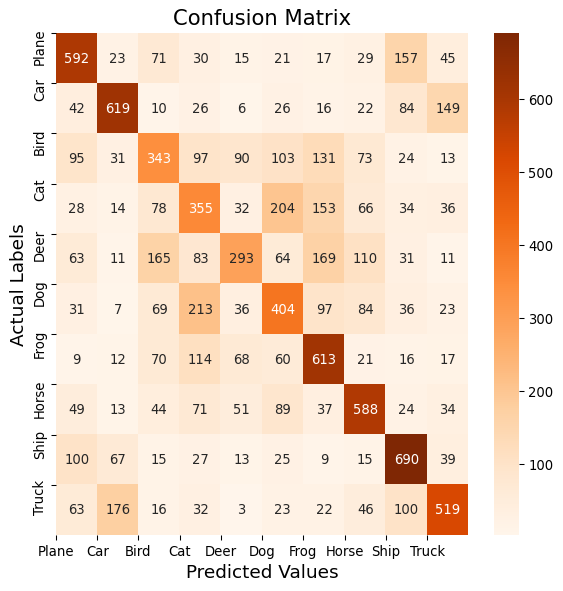

In [66]:
#To plot Confusion matrix
plt.figure(figsize=(7,7) , dpi =95)
sn.heatmap(conf_matrix , cmap= plt.cm.Oranges ,annot = True , fmt = '.0f')

plt.title('Confusion Matrix' , fontsize = 16)
plt.xlabel('Predicted Values' , fontsize = 14)
plt.ylabel('Actual Labels' , fontsize = 14)

tick_marks = np.arange(NR_CLASSES)
plt.xticks(tick_marks , LABEL_NAMES)
plt.yticks(tick_marks , LABEL_NAMES)

plt.show()

### 7.2 Recall , Precision & F-Score

In [50]:
# True Positives
true_positive = np.diag(conf_matrix)

In [51]:
# True Positive + False negative
true_pos_plus_false_neg = np.sum(conf_matrix , axis =1 ) 

In [52]:
# True Positive + False Positive
true_pos_plus_false_pos = np.sum(conf_matrix , axis = 0)

#### 7.2.1 Recall

In [53]:
recall = true_positive / true_pos_plus_false_neg
recall

array([0.592, 0.619, 0.343, 0.355, 0.293, 0.404, 0.613, 0.588, 0.69 ,
       0.519])

In [54]:
avg_recall = np.mean(recall)
print(f'The average recall score is {avg_recall:.2%}')

The average recall score is 50.16%


#### 7.2.2 Precision

In [55]:
precision = true_positive/true_pos_plus_false_pos
precision

array([0.55223881, 0.63617677, 0.38933031, 0.33874046, 0.48270181,
       0.39646712, 0.48496835, 0.55787476, 0.57692308, 0.58577878])

In [56]:
avg_precision = np.mean(precision)
print(f'Model 2 precison score is {avg_precision:.2%}')

Model 2 precison score is 50.01%


#### 7.2.3 F-1 Score

In [57]:
f1_score = 2*(avg_precision * avg_recall ) / (avg_precision + avg_recall)
print(f'Model 2 F-score is {f1_score:.2%}')

Model 2 F-score is 50.09%
